<a href="https://colab.research.google.com/github/marpulli246/VaasaUniversity-AML/blob/main/Exercises/Markku_Pulli_Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning (2021), exercises


## General instructions for all exercises

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Do not change other areas of the document, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manualle graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks may be text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, download the whole notebook, using menu `File -> Download as -> Notebook (.ipynb)`. Save the file in your hard disk, and submit it in [Moodle](https://moodle.uwasa.fi) under the corresponding excercise.

Your solution should be an executable Python code. Use the code already existing as an example of Python programing and read more from the numerous Python programming material from the Internet if necessary. 


In [ ]:
NAME = "Markku Pulli"
Student_number = "121763"

---

## Reading, and visualizing data with pandas

This exercise contains the following tasks:

1. Read the CSV data to Pandas dataframe
1. Study the data statistics 
1. Slice and plot Finnish Covid cases
1. Parse timestamps from strings
1. Differentiate the data to get daily cases
1. Store the data in four different formats

In [3]:
#%load_ext autoreload
#%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import Ex2code

import seaborn as sns
# This makes the plots to have white background and grids by default
#plt.style.use('seaborn-whitegrid')
sns.set()


### Task 1: Read and examine data
#### a) Read the CSV data to Pandas dataframe

Read the data file `time_series_covid_19_confirmed.csv` to a pandas dataframe called `D`, and display the head and tail of the dataframe.

The data is taken from [Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?rvi=1).

In [5]:
# YOUR CODE HERE
D = pd.read_csv('/content/time_series_covid_19_confirmed.csv')
D.shape

(276, 498)

In [6]:
# Some testing
assert(D.shape == (276,498)), "The shape of the data does not seem to be correct"

#### Task 1 b)  Study the statistics of the data

Study the statistics of the corona data, using `.head()` and `.describe()` functions. 
Do you find missing values in the data? If you do, which column contains most of the missing values

In [7]:
print(D.head())
missing = D.columns[D.isnull().any()]
print(missing)

  Province/State Country/Region       Lat  ...  5/27/21  5/28/21  5/29/21
0            NaN    Afghanistan  33.93911  ...    68366    69130    70111
1            NaN        Albania  41.15330  ...   132264   132285   132297
2            NaN        Algeria  28.03390  ...   127926   128198   128456
3            NaN        Andorra  42.50630  ...    13682    13693    13693
4            NaN         Angola -11.20270  ...    33607    33944    34180

[5 rows x 498 columns]
Index(['Province/State', 'Lat', 'Long'], dtype='object')


In [8]:
print(D['Province/State'].isna().sum())
print(D['Lat'].isna().sum())
print(D['Long'].isna().sum())

190
2
2


In [9]:
D.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
count,274.000000,274.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02
mean,20.447559,22.328281,2.018116,2.373188,3.409420,5.192029,7.673913,10.605072,20.210145,22.344203,29.836957,35.967391,43.615942,60.822464,72.054348,86.586957,100.155797,111.605072,124.623188,134.528986,145.507246,154.960145,162.358696,163.873188,218.775362,242.423913,250.188406,258.097826,265.471014,272.289855,274.101449,276.130435,278.409420,284.789855,286.166667,288.210145,291.300725,294.840580,299.768116,304.789855,...,5.179451e+05,5.211696e+05,5.244296e+05,5.277041e+05,5.306785e+05,5.332957e+05,5.357696e+05,5.388292e+05,5.421118e+05,5.453640e+05,5.485488e+05,5.514354e+05,5.538786e+05,5.563482e+05,5.592737e+05,5.623216e+05,5.654737e+05,5.684865e+05,5.713364e+05,5.736608e+05,5.759141e+05,5.785898e+05,5.813437e+05,5.839716e+05,5.865732e+05,5.888468e+05,5.908331e+05,5.927885e+05,5.950428e+05,5.974743e+05,5.984867e+05,6.007543e+05,6.028478e+05,6.045727e+05,6.062187e+05,6.081457e+05,6.102044e+05,6.122130e+05,6.140244e+05,6.157665e+05
std,25.189838,74.369096,26.781738,26.879567,33.464159,46.575328,65.089830,87.699030,215.201418,216.521511,298.377294,353.754834,435.313401,676.494833,817.788348,1007.884613,1187.714772,1335.148694,1506.165586,1635.472132,1787.715018,1913.867390,2012.441881,2012.780205,2904.064734,3276.799205,3387.689187,3503.968094,3612.651852,3714.479264,3735.499036,3760.204488,3773.510303,3859.001700,3859.042744,3871.327211,3901.385100,3925.695938,3950.861847,3970.967454,...,2.388134e+06,2.401311e+06,2.414529e+06,2.428350e+06,2.441772e+06,2.453494e+06,2.465097e+06,2.479111e+06,2.494151e+06,2.509368e+06,2.525012e+06,2.539842e+06,2.552421e+06,2.565681e+06,2.580650e+06,2.596690e+06,2.613039e+06,2.629200e+06,2.644631e+06,2.657808e+06,2.670406e+06,2.684667e+06,2.699614e+06,2.714109e+06,2.728461e+06,2.741432e+06,2.752445e+06,2.763204e+06,2.775108e+06,2.787589e+06,2.797198e+06,2.808982e+06,2.819859e+06,2.828976e+06,2.837786e+06,2.847660e+06,2.857958e+06,2.867378e+06,2.875765e+06,2.883996e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,

In [10]:
ans1b=Ex2code.task1b()
display(ans1b)

Which of the features contains most missing values


RadioButtons(description='Select feature:', options=(('No selection', -1), ('There are no missing values', 0),…

In [11]:
assert(ans1b.value>=0), "Please make a selection from the previous menu"


#### Task 1 c) Missing values
What would be the best strategy to mitigate missing values if we are interested only in Finnish situation? Drop rows with missing values, Drop columns with missing values or impute missing values with empty strings?


In [12]:
# Write your code for studying the data here and then select correct answer from the 
# list in the next cell

# YOUR CODE HERE
FinDF = D[D['Country/Region'] == 'Finland'].iloc[:, 4:]
missingF = FinDF.columns[FinDF.isnull().any()]
print(missingF)
# Finland is not missing any data. No need for any data imputation action.

FinDF.head()

Index([], dtype='object')


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
118,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,6,...,84501,84797,85077,85344,85607,85804,85937,86161,86405,86613,86808,87096,87228,87345,87529,87798,88078,88332,88561,88723,88866,88990,89270,89532,89686,89878,90105,90249,90398,90687,90946,91157,91405,91526,91619,91744,91964,92062,92244,92244


In [13]:
ans1c=Ex2code.task1c()
display(ans1c)

RadioButtons(description='Strategy:', options=('No selection', 'Drop columns', 'Drop rows', 'Imputation', 'Non…

In [14]:
print(ans1c.value)
assert(ans1c.value!="No selection"), "Please make a selection from the previous menu"


None


### Task 2: Slice and plot Finnish Covid cases

Select the data to represent confirmed Covid cases in Finland, by selecting the right row, and only those columns, which shows the numbers of cases (all columns except first four). Transpose the selected slice of the Dataframe, using transpose operator `.T`. This makes rows to become columns and columns to become rows, just like the transpose of a Matrix in mathematics. You can chain the `.loc`, `.iloc` and `.T` operators in one line to accomplish your task.

Save this resulting one-column dataframe by name `DF` in the workspace, and plot it using `.plot()` -function.


Missing value Index([], dtype='object')


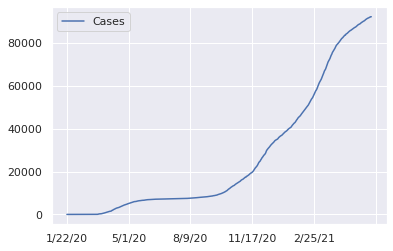

In [15]:
# YOUR CODE HERE
option = ['Finland']
#DF = D[D['Country/Region'].isin(option)]
#DF = D[D['Country/Region'] == 'Finland'].iloc[[0],[4,-1]]
DF = D[D['Country/Region'] == 'Finland'].iloc[:, 4:].T
DF.set_axis(['Cases'], axis=1, inplace=True)
DF.head()
missing = DF.columns[DF.isnull().any()]
print('Missing value',missing)
DF.to_csv('/content/DF.csv', index=False)
DF.plot()

In [16]:
assert(DF.shape==(494,1))

### Task 3: Parse timestamps to datetime objects
The data looks familiar and would be usefull already for many purposes, but it has still a problem. This is obviously a time series, but the computer does not yet understand what the values in time-axis are, and they are handled just strings without meaning. 

To let the computer understand them, they needs to be parsed to datetime objects. Any string can be parsed to datetime using string parser function, called `strptime()`. It uses a template for mathing a string to years (`%y`), months (`%m`) and days (`%d`). See more exact description from the [documentation](https://www.programiz.com/python-programming/datetime/strptime).

The function for parsing the timestamp strings is provided below.


In [17]:
#task4
indexes=DF.index

from datetime import datetime

# Parse a timestamp
def parseTime(s):
    return datetime.strptime(s, "%m/%d/%y")

DF.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=494)

Replace the index of `DF` by parsing the list of values in it into list of datetime objects, and assign it to the new index. 

You can read the values of the current index, using a read/write property `.index` of the dataframe, and you can update the index by assigning a list of datetime objects into it. 

You can apply the previous `parseTime()`-function to all values in a list of date-strings by using a `map()` function in python as follows

 `map(parseTime, listOfStringValues)`
 
 See more from [documentation](https://www.programiz.com/python-programming/methods/built-in/map).
 
 Note that if you try to run it again, it will give you an error, since the index values are no longer strings, which could be parsed again.
 
 Now plot the data again, and you will notice that the computer now understands the time axis and can show it differently.
 
 Try to slice the data and only plot the values for september (`DF.loc['yyyy-mm']`). See how the time axis is scaled again.

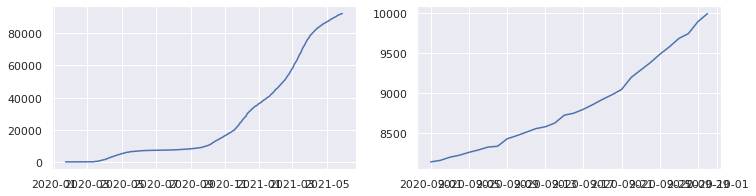

In [18]:
# YOUR CODE HERE
DF.index = map(parseTime,DF.index)
#DF.plot(figsize=(6,6))
#DF.loc['2020-09'].plot(figsize=(6,6))

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
#fig.tight_layout()
ax[0].plot(DF)
ax[1].plot(DF.loc['2020-09'])

plt.show()

In [19]:
#assert((DF.loc['2020-09-23']==5343).values[0])
assert((DF.loc['2020-09-23']==9288).values[0])

### Task 5: Differentiate to get the daily cases

Now calculate the daily cases, by calculating the difference of the cumulative number of confirmed cases, using the `.diff()` function of the dataframe as name `daily`, and plot it. 

If you have time, you can also smooth the daily graph by using a rolling average (`.rolling()`), and plot the smoothed curve in different plot or the same plot. See examples from:
- Pandas [diff function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)
- Pandas [rolling function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

Tip: If you want to plot both graphs in one figure, let the first plot return an axis object `ax` and define the new plot to use that same axis, as follows:

`
ax = daily. ... .plot(...)
daily. ... .plot(ax=ax)
`

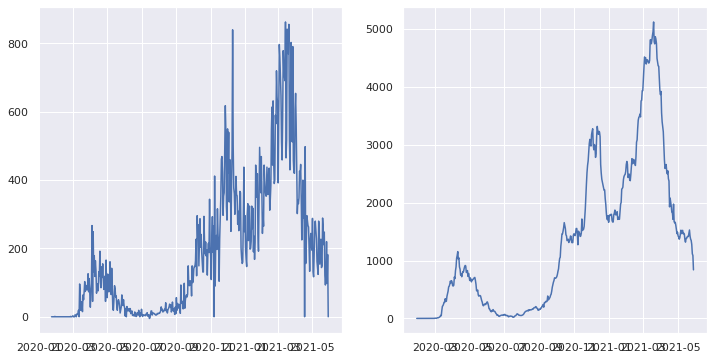

In [20]:
# YOUR CODE HERE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
daily = DF.diff()
#daily.plot(figsize=(6,5))
daily2 = daily.rolling(7).sum()
#daily2.plot(figsize=(6,5))
ax[0].plot(daily)
ax[1].plot(daily2)

In [21]:
assert(daily.shape==(494,1)), "The shape of the differentiated data does not seem right"
print(daily.loc['2020-09-23'])
#assert(daily.loc['2020-09-23'].values[0]==36)
assert(daily.loc['2020-09-23'].values[0]==93)

Cases    93.0
Name: 2020-09-23 00:00:00, dtype: float64


### Task 6: Save the parsed data to different formats

Save the parsed dataframe, DF, in different formats:
 - CSV, use function `.to_csv()`, read documentation inline or from [net](), use filename `cases.csv`
 - HDF5, use function `.to_hdf()`, read documentation inline or from [net](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_hdf.html), use filename `cases.hdf`, and key='data'
 - parquet, use function `.to_parquet()`, read documentation inline or from [net](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_parquet.html), use filename `cases.parquet`
 - feather, use function `.to_feather()`, read documentation inline or from [net](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_feather.html), use filename `cases.feather`
 
 Unfortunately feather or parquet do not support datetime objects as index. To overcome this issue, a new index consisting of only integers is created, and the dat is moved to the separate column. This can be accomplished by simply calling the `.reset_index()` from the dataframe.
 
 In addition, Feather and Parquet requires valid column names, so they needs to be defined too, which is a good idea anyway. The column names can be set using read/write property `.columns`:
 
 Both requirements can be set as follows:
 
 `
 DF_fixed = DF.reset_index()
 DF_fixed.columns=('Date', 'Cases')
 `
 
**See the code in the validation section for reading the files back.**

**Note** If you do this at home, install `pyarrow` to support parquet. 

In [22]:
# YOUR CODE HERE
DF.to_csv('/content/cases.csv')
DF.to_hdf('/content/cases.hdf', key='data')
DF2=DF.reset_index()
DF2.columns=('Date', 'Cases')
DF2.to_parquet('/content/cases.parquet',index=None)
DF2=DF.reset_index()
DF2.to_feather('/content/cases.feather')

In [23]:
data_csv=pd.read_csv('/content/cases.csv')
data_hdf=pd.read_hdf('/content/cases.hdf', key='data')
data_par=pd.read_parquet('/content/cases.parquet')
data_fea=pd.read_feather('/content/cases.feather')

print(data_hdf.iloc[1,0])

assert((data_csv.shape==(494,2)) or (data_csv.shape==(494,3)))
assert((data_hdf.shape==(494,1)) or (data_hdf.shape==(494,2)))
assert(data_par.shape==(494,2))
assert(data_fea.shape==(494,2))

# Check the types of the datetime column values
assert((type(data_csv.iloc[1,0])==str) or (type(data_csv.iloc[1,1])==str))
assert((type(data_hdf.index[0])==pd.Timestamp) or (type(data_hdf.iloc[1,0])==pd.Timestamp))
assert(type(data_par.iloc[1,0])==pd.Timestamp)
assert(type(data_fea.iloc[1,0])==pd.Timestamp)

0


Note that the binary data formats retain the timestamps objects as timestamps, whereas after reading CSV, the timestamps needs to be parsed again to timestamps.

To help deciding which format to use in your own projects, take a look at the 
[comparison of different file formats](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d). The optimal file format depends also on the application.